In [1]:
import numpy as np
from numpy.lib.stride_tricks import sliding_window_view
import matplotlib.pyplot as plt

In [2]:
N = 100
w = 2 
a = 1.4
b = 0.3 
init_state = np.array([0.1, 0.1])

In [3]:
def state_transition(state): 
    return np.array(
        [
            1 - a * state[0]**2 + b * state[1],
            state[0]
            ]
        )

states = np.array([init_state])

for i in range(N - 1):
    new_state = state_transition(states[-1])
    states = np.append(states, [new_state], axis=0)

In [4]:
time_series = states[:, 0]
random_time_series = np.random.permutation(time_series)

window_embedding_time_series = sliding_window_view(time_series, w)
window_embedding_random = sliding_window_view(random_time_series, w)

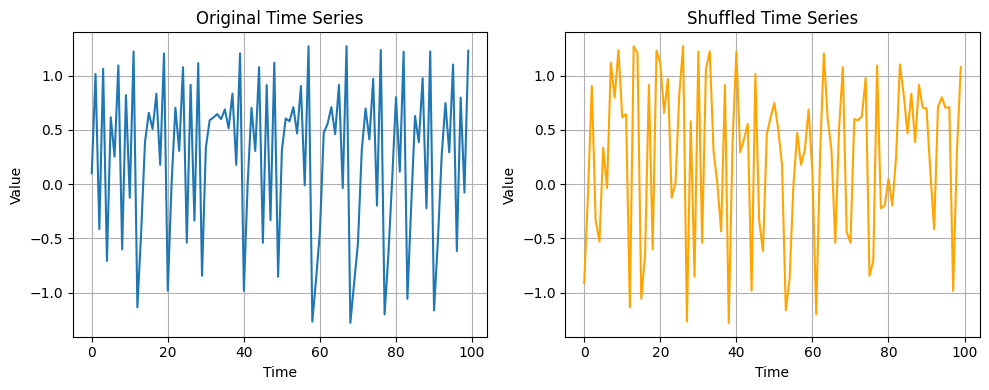

In [6]:
# ------- FIRST PLOT: Time series -------
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(time_series, label='Original')
plt.title('Original Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(random_time_series, label='Shuffled', color='orange')
plt.title('Shuffled Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)

plt.tight_layout()
plt.show()

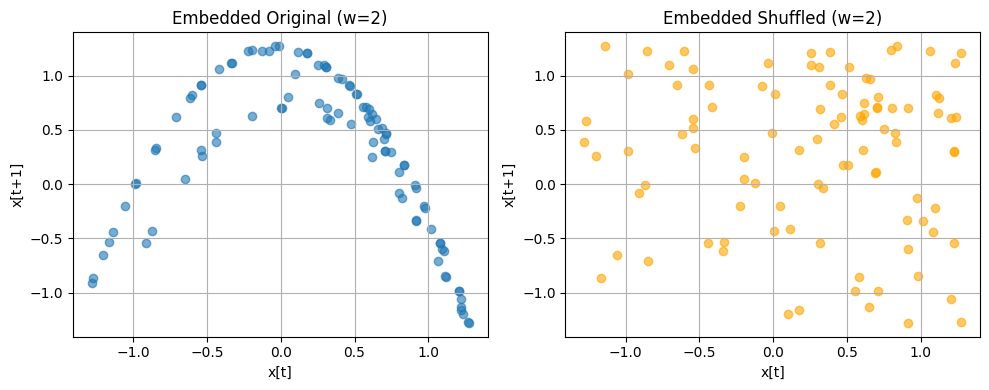

In [7]:
# ------- SECOND PLOT: Scatter of Embeddings -------
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(window_embedding_time_series[:, 0], window_embedding_time_series[:, 1], alpha=0.6)
plt.title('Embedded Original (w=2)')
plt.xlabel('x[t]')
plt.ylabel('x[t+1]')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(window_embedding_random[:, 0], window_embedding_random[:, 1], alpha=0.6, color='orange')
plt.title('Embedded Shuffled (w=2)')
plt.xlabel('x[t]')
plt.ylabel('x[t+1]')
plt.grid(True)

plt.tight_layout()
plt.show()
